In [2]:
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [62]:
def calc_change(All_valid_params, GEnx_OD_true):
    All_change = []
    meanL = []
    paramE = ["TT25", "TT3", "Ps3", "TT49", "Wf", "N2"]
    for flight_phase, legend in zip(range(3), ['Take off', 'Climb', 'Cruise']):
        y_sim_valid = All_valid_params[flight_phase]
        trueVal = GEnx_OD_true[flight_phase]
        change = (trueVal - y_sim_valid) / (trueVal + 0.000001)
        meanE = 100 * np.sqrt(np.mean(change ** 2, axis=0))
        All_change.append(change)
        meanL.append(list(meanE))
    All_change = [item for sublist in All_change for item in sublist]
    Rms = np.sqrt(np.mean(np.mean(np.array(All_change) ** 2, axis=0)))
    return np.array(meanL), Rms

In [175]:

directory = "Reynolds_pickle/"

takeoff_error_list = []
climb_error_list = []
cruise_error_list = []

takeoff_error_uncorrected_list = []
climb_error_uncorrected_list = []
cruise_error_uncorrected_list = []

rms_list = []
rms_uncorrected_list = []



for file_name in os.listdir(directory)[:-1]:
        
        
#     try:
    file_name_corrected_result = "Results_validation/Results_one_equation_DP_calibration_Nozzles_" + file_name.strip("Reynolds_CEOD_")

    GEnx_OD_true = pickle.load(open(directory + file_name,"rb"))[1]
    All_validation_params_uncorrected = pickle.load(open(directory + file_name,"rb"))[5]
    All_validation_params_corrected = pickle.load(open(file_name_corrected_result,"rb"))[0]
    
    if file_name == "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2.p":
        
        _, GEnx_OD_true,_N, _ = pickle.load(open(f"CEOD_GEnx/same_engine_flights/CEOD_data_mohamed_2019_feb_1-9_2.p", "rb"))

        All_validation_params_training_uncorrected = pickle.load(
                    open("Results/Results_no_OD_scaling_data_mohamed_2019_feb_1-9_2.p", "rb"))[0]
        All_validation_params_training_corrected = pickle.load(
                    open("Results/Results_one_equation_DP_calibration_Nozzles_data_mohamed_2019_feb_1-9_2.p", "rb"))[0]
    
        
        meanL_training_uncorrected, Rms_training = calc_change(All_validation_params_training_uncorrected, GEnx_OD_true)
        meanL_training_corrected, Rms_training = calc_change(All_validation_params_training_corrected, GEnx_OD_true)
        
        print(meanL_training_corrected)
        continue


    
    meanL_uncorrected, Rms_uncorrected = calc_change(All_validation_params_uncorrected, GEnx_OD_true)
    meanL_corrected, Rms_corrected = calc_change(All_validation_params_corrected, GEnx_OD_true)
    
    takeoff_error_list.append(meanL_corrected[0])
    climb_error_list.append(meanL_corrected[1])
    cruise_error_list.append(meanL_corrected[2])
    
    takeoff_error_uncorrected_list.append(meanL_uncorrected[0])
    climb_error_uncorrected_list.append(meanL_uncorrected[1])
    cruise_error_uncorrected_list.append(meanL_uncorrected[2])
    
    rms_list.append(Rms_corrected)
    rms_uncorrected_list.append(Rms_uncorrected)
    

#     except Exception as exception:
#         print(file_name, exception)

[[0.4310057  0.55095906 0.76553584 0.16887197 0.40658182 0.75668836]
 [1.83356053 1.8965395  2.13825891 0.82714344 1.65324463 1.35869639]
 [1.2397063  0.66459875 0.66593208 0.73581601 1.33602054 0.75745707]]


In [176]:
def barC(outputval, selected_k, title, save_name):
    outp_length = len(outputval[0])
    len_k = 3
    r = np.arange(outp_length)
    width = 0.18
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=500)
    colorl = ['#FF1F5B', '#009ADE', '#00CD6C']

    for i in range(len_k):
        label = selected_k[i] 
        rec = ax.bar(r + (width * i), np.round(outputval[i], 1), color=colorl[i], width=width-0.015, edgecolor=colorl[i],
                     label=label,
                     tick_label=outputval[i])
    
    ax.yaxis.grid(alpha=0.7)  # grid lines
    ax.set_axisbelow(True)  # grid lines are behind the rest
    plt.xlabel("Parameters")
    plt.ylabel("Error [%]")
    
#     plt.ylim([0, 6])
    plt.xticks(r + width * 1, ["TT25", "TT3", "Ps3", "TT49", "Wf", "N2"])  
    plt.yticks(np.arange(6, step=1))
    legends = plt.legend(loc='upper right', fontsize=7) 
    for handle in legends.legendHandles:
        handle.set_height(5) 
        handle.set_width(15)
    
#     plt.title(title)
    fig.tight_layout()
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + save_name + '.jpeg')
    
    plt.show()

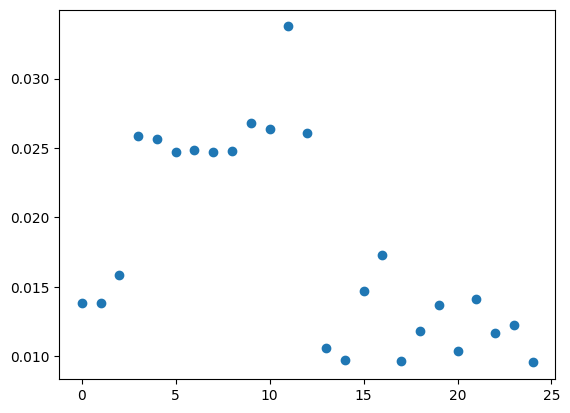

In [177]:
plt.scatter(np.arange(len(rms_list)), rms_list)

In [178]:
def create_boxplot(array, scatter_array, save_name):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3), dpi=500)

    # Create the box plot
    boxplot = ax.boxplot(array)
    for line in boxplot['medians']:
        line.set_color('#FF1F5B')

    
    parameter_names = ["TT25", "TT3", "Ps3", "TT49", "Wf", "N2"]  # Replace with your parameter names
    parameter_positions = range(1, len(scatter_array) + 1) 
    ax.scatter(parameter_positions, scatter_array, c ='#009ADE', label='Fitting flight', edgecolor='black', alpha=0.7, zorder=np.inf)
    ax.set_xticklabels(parameter_names)
    ax.yaxis.grid(True, alpha=0.3)
    

    # ax.set_title("Box Plot of Parameters")
    ax.set_ylabel("Error [%]")
    ax.legend()
    # Show the plot
    plt.tight_layout()
    
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + save_name + '.jpeg')
    plt.show()

In [179]:
avg_TO_E = np.mean(np.array(takeoff_error_list), axis=0)
avg_CL_E = np.mean(np.array(climb_error_list), axis=0)
avg_CR_E = np.mean(np.array(cruise_error_list), axis=0)

avg_TO_uncorrected_E = np.mean(np.array(takeoff_error_uncorrected_list), axis=0)
avg_CL_uncorrected_E = np.mean(np.array(climb_error_uncorrected_list), axis=0)
avg_CR_uncorrected_E = np.mean(np.array(cruise_error_uncorrected_list), axis=0)


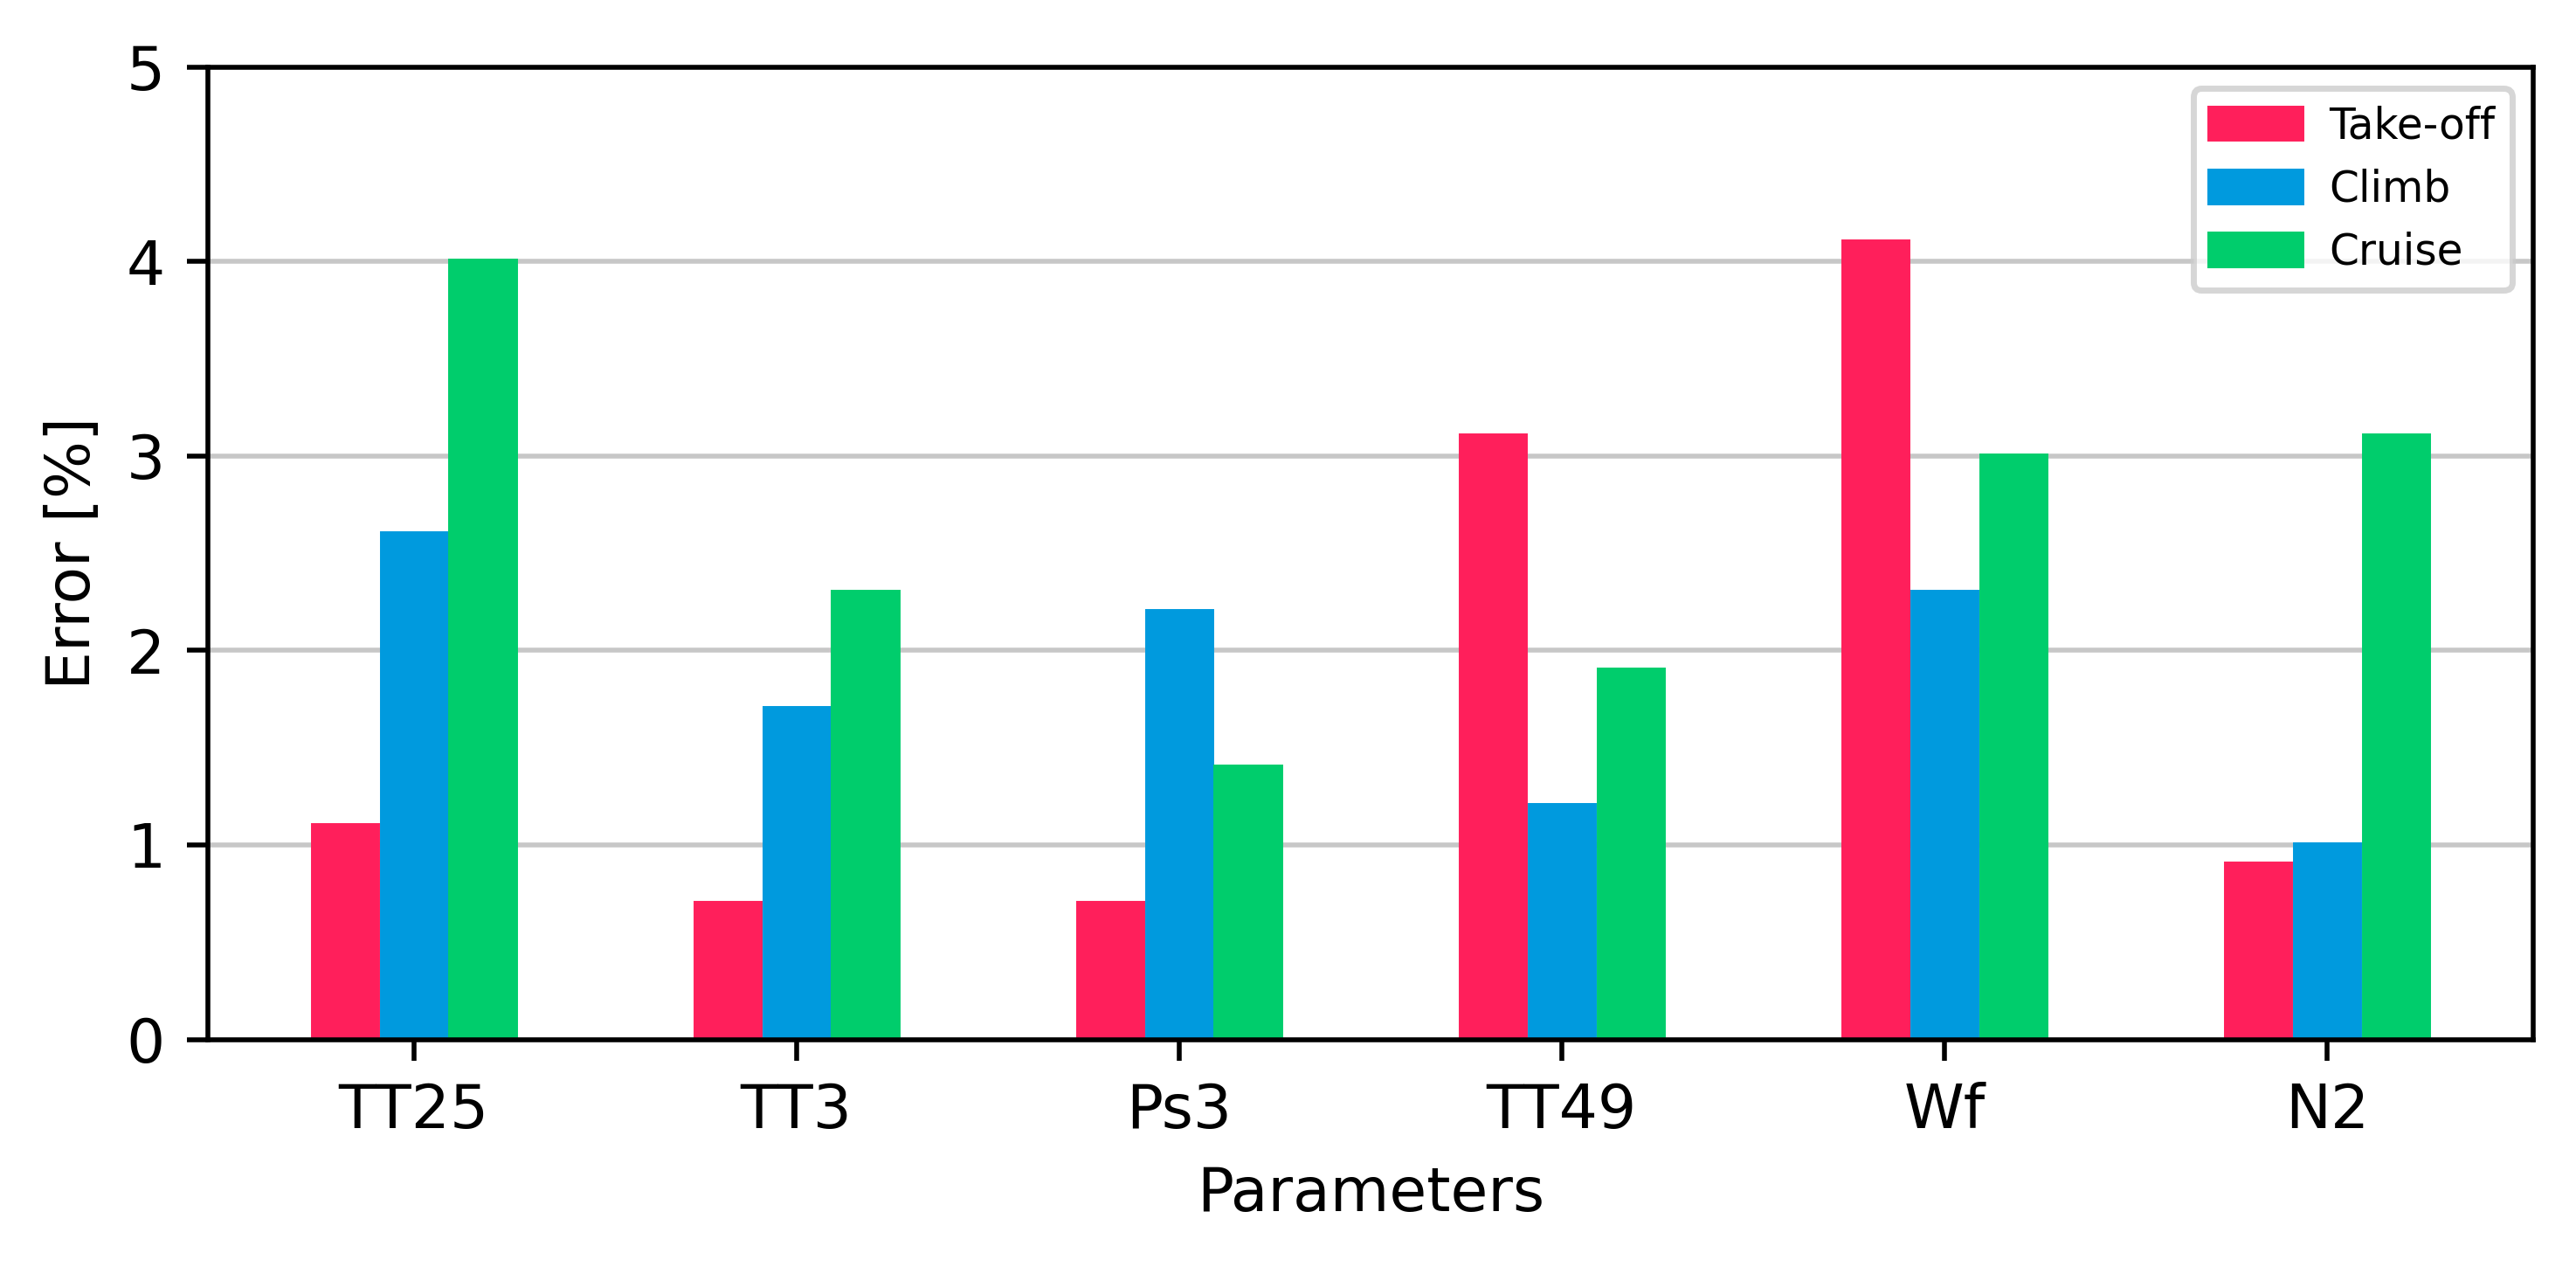

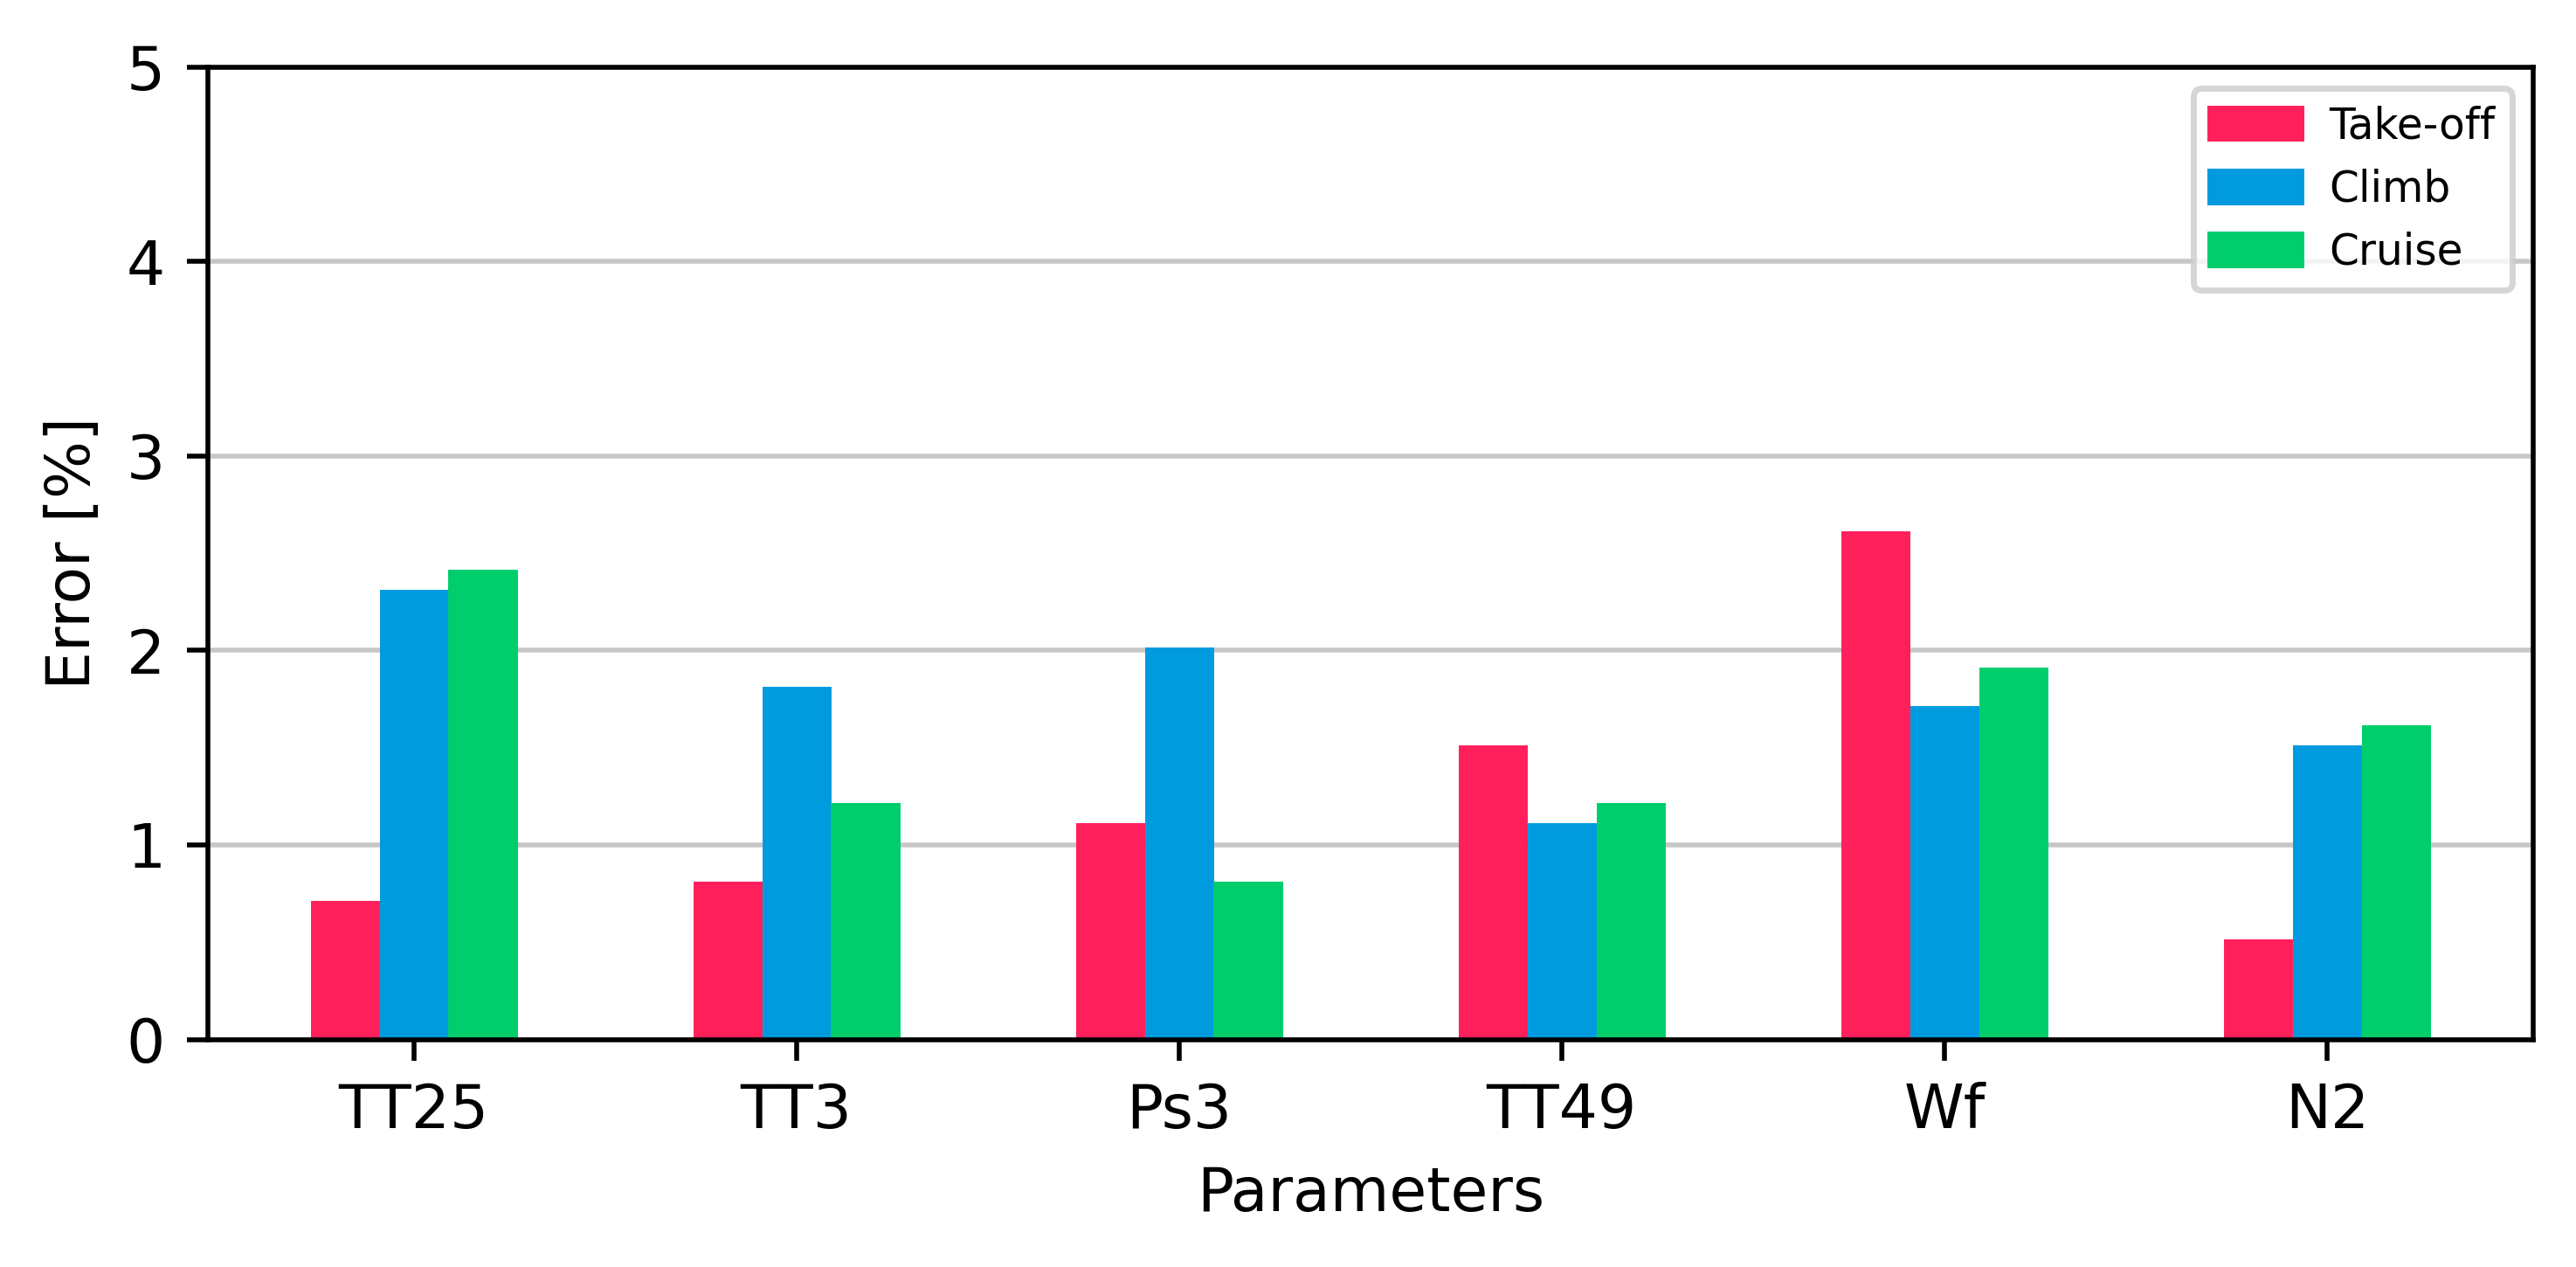

In [180]:
barC([avg_TO_uncorrected_E, avg_CL_uncorrected_E, avg_CR_uncorrected_E], ['Take-off', 'Climb', 'Cruise'],
             f'without correction',
    save_name=f'Average error uncorrected')

barC([avg_TO_E, avg_CL_E, avg_CR_E], ['Take-off', 'Climb', 'Cruise'],
             f'with correction',
    save_name=f'Average error')

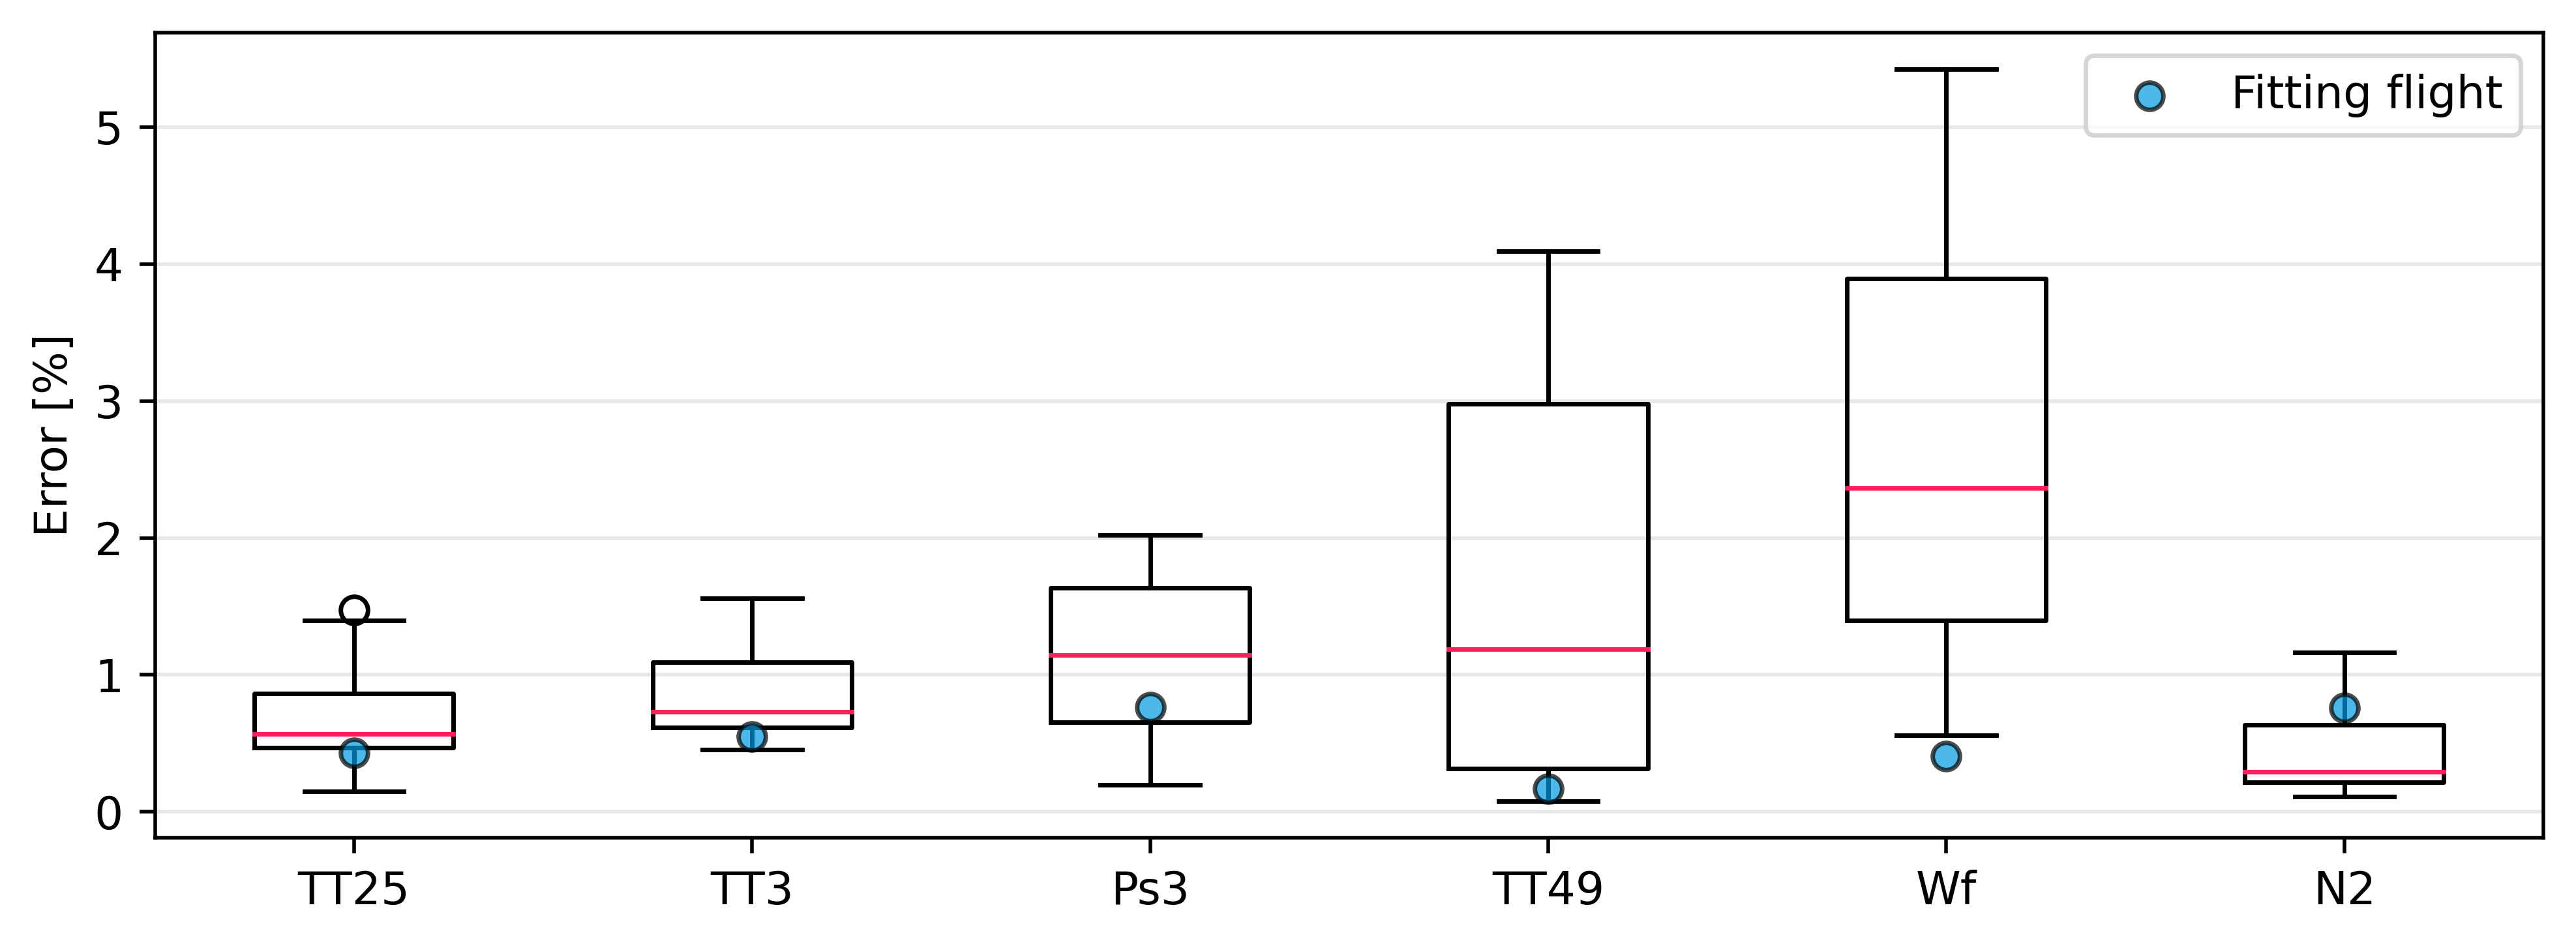

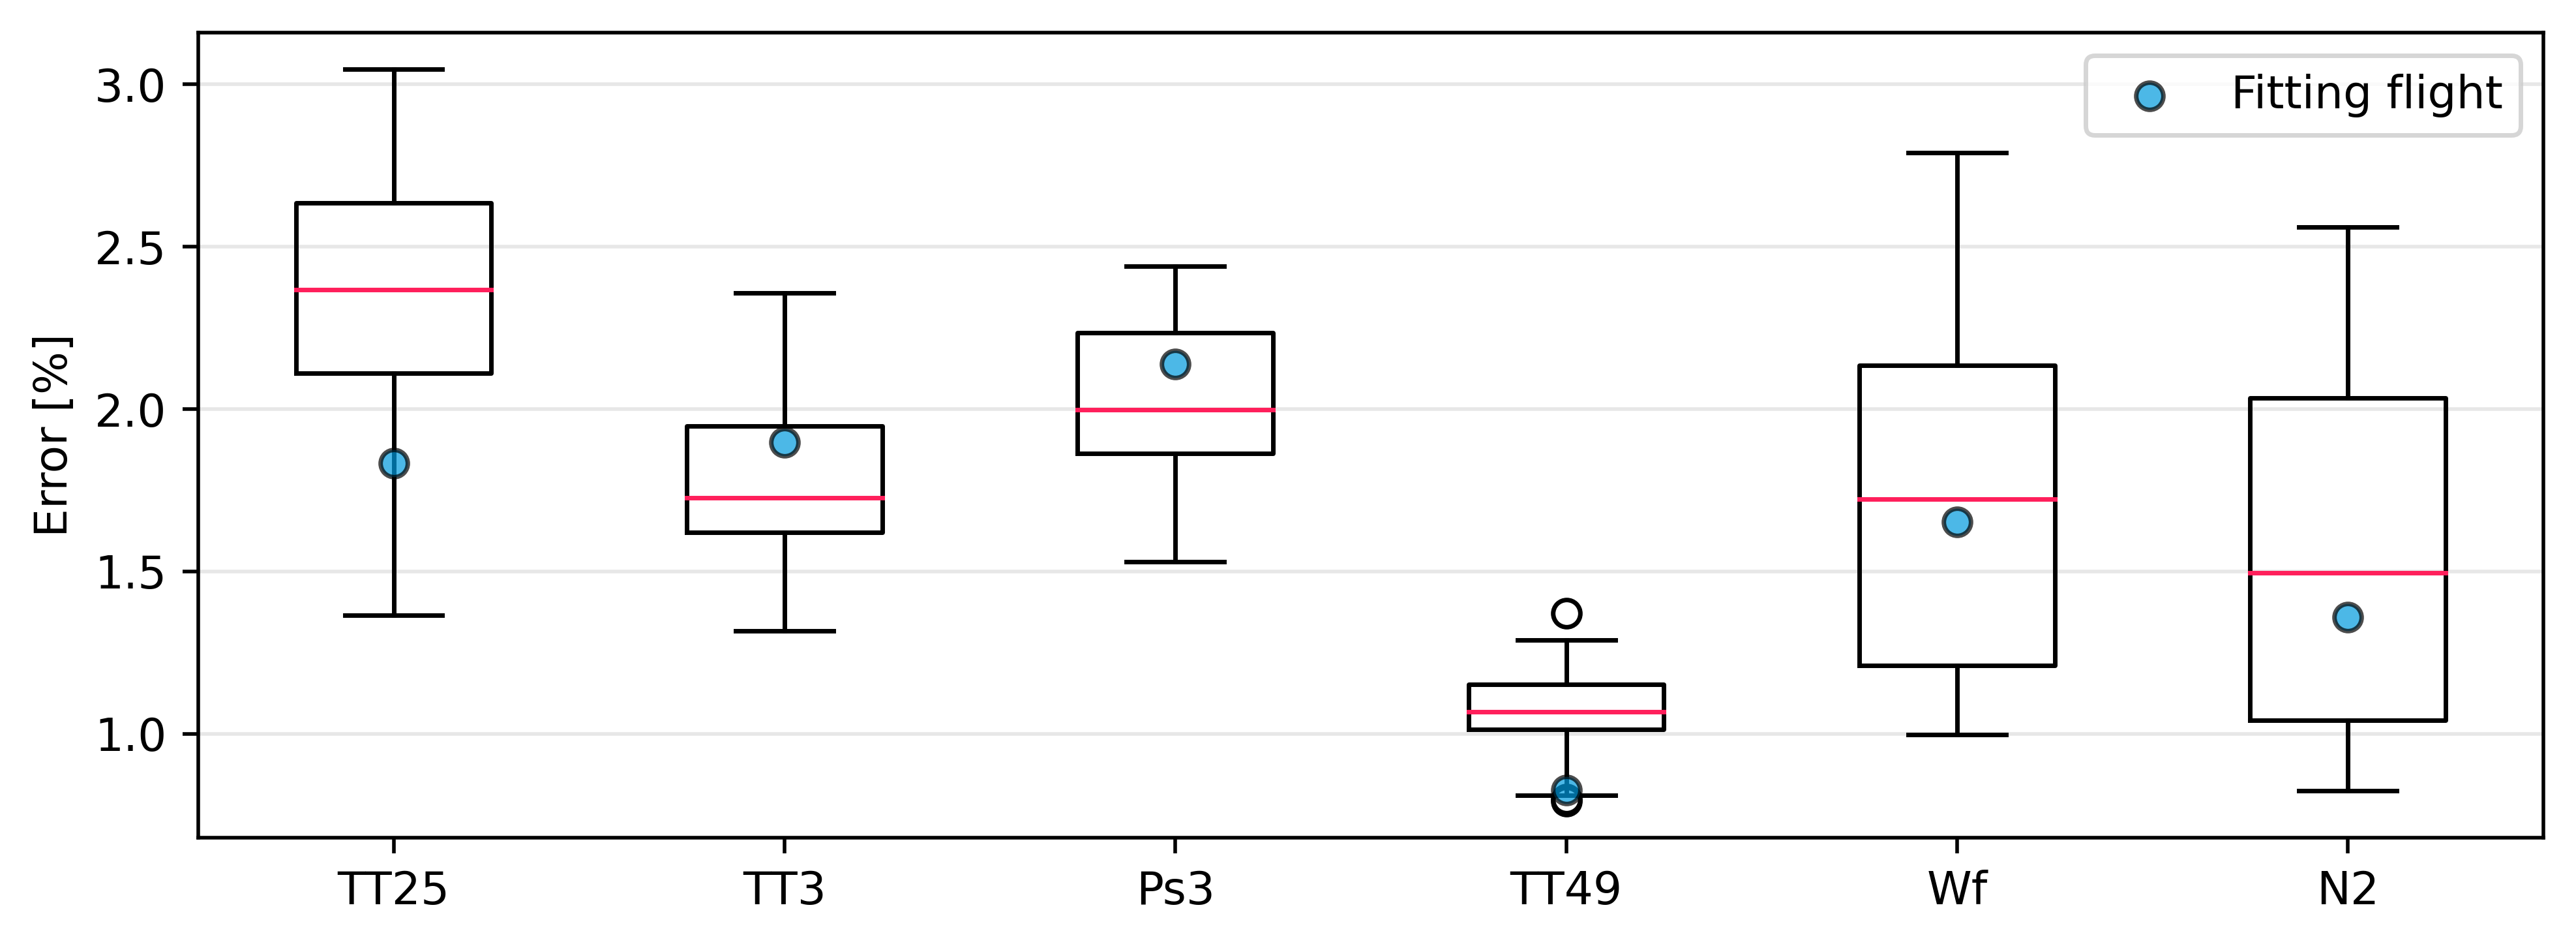

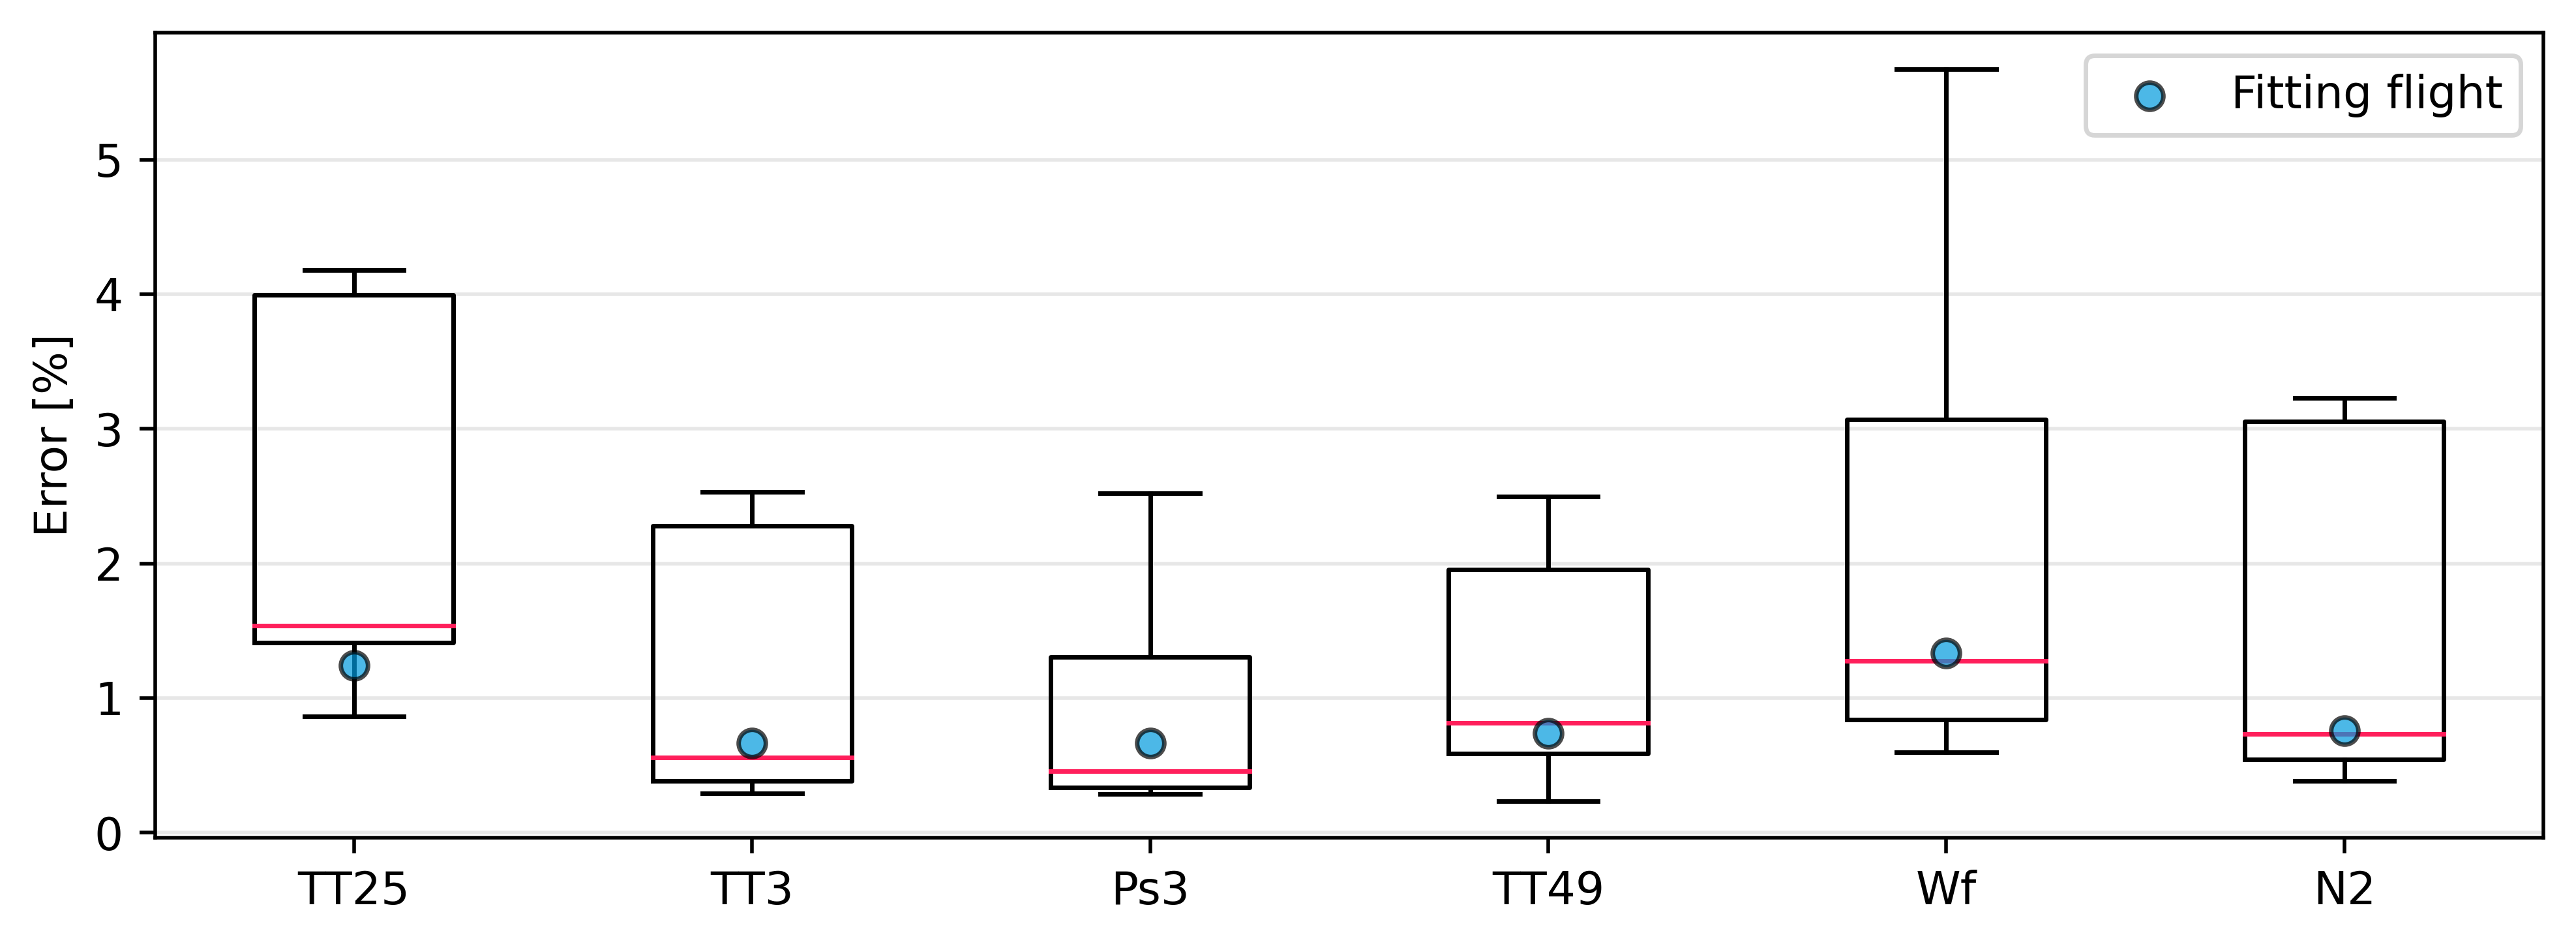

In [181]:
create_boxplot(np.array(takeoff_error_list), meanL_training_corrected[0],  "take off corrected boxplot")
create_boxplot(np.array(climb_error_list), meanL_training_corrected[1], "climb corrected boxplot")
create_boxplot(np.array(cruise_error_list), meanL_training_corrected[2], "cruise corrected boxplot")

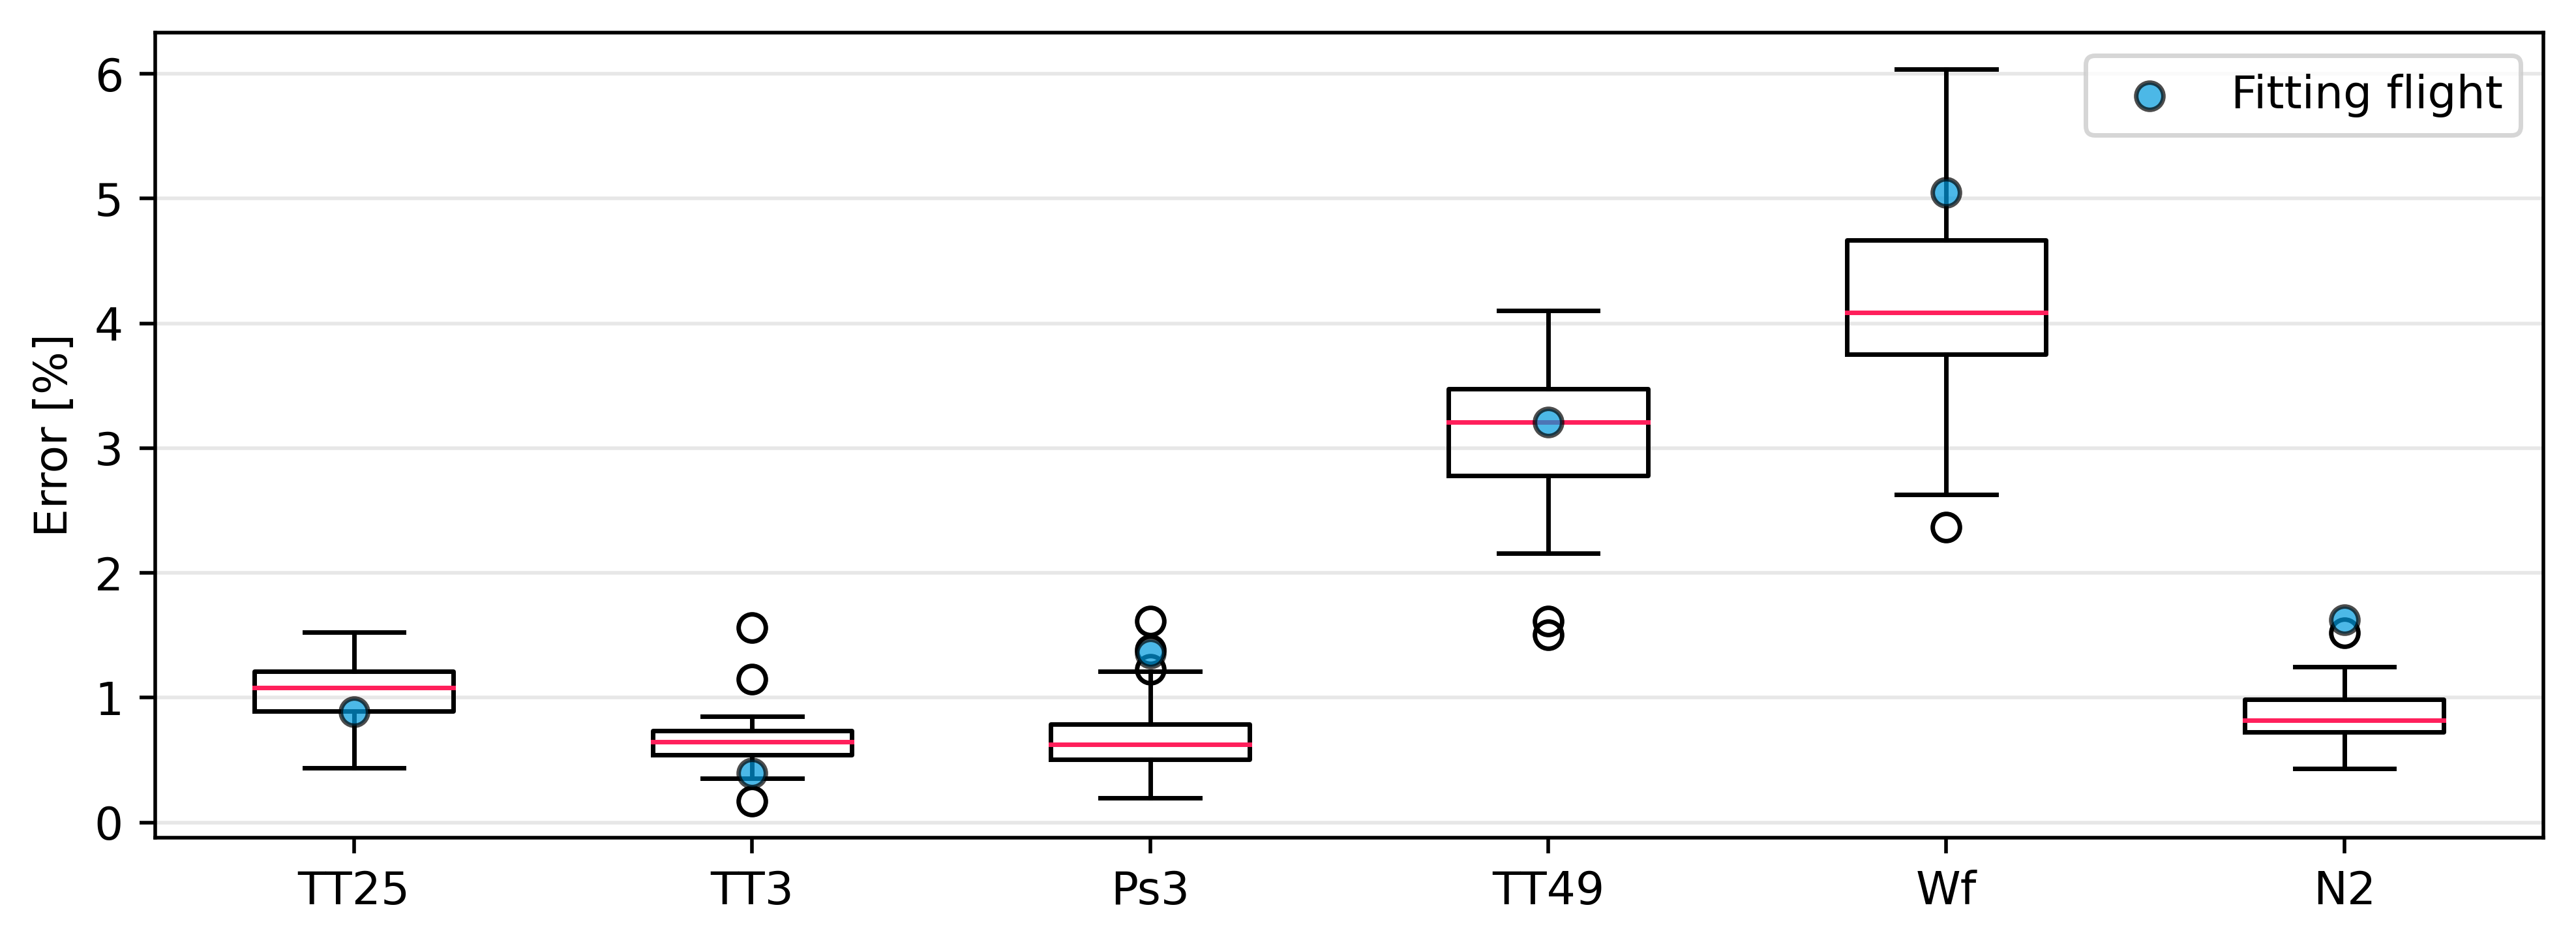

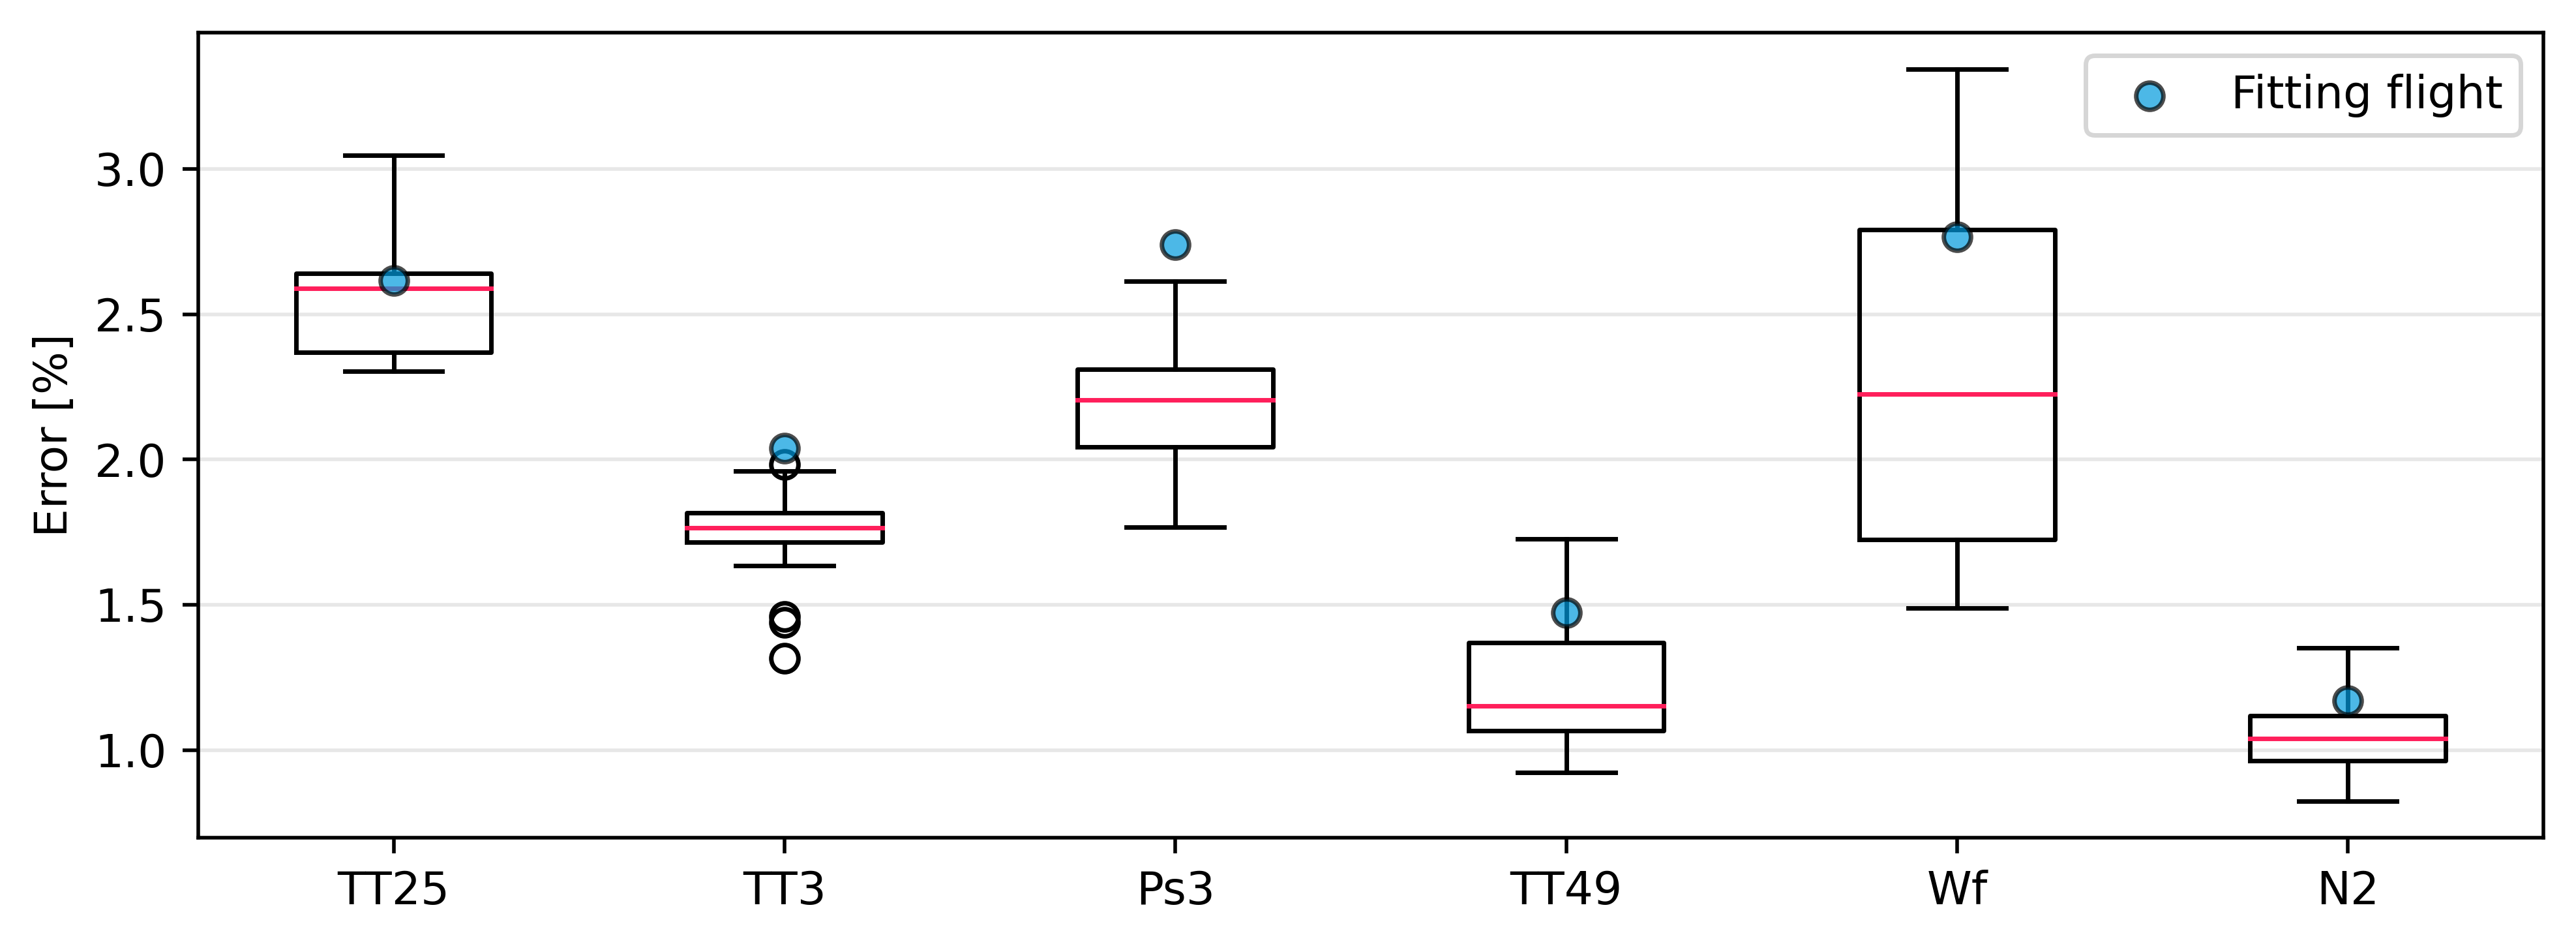

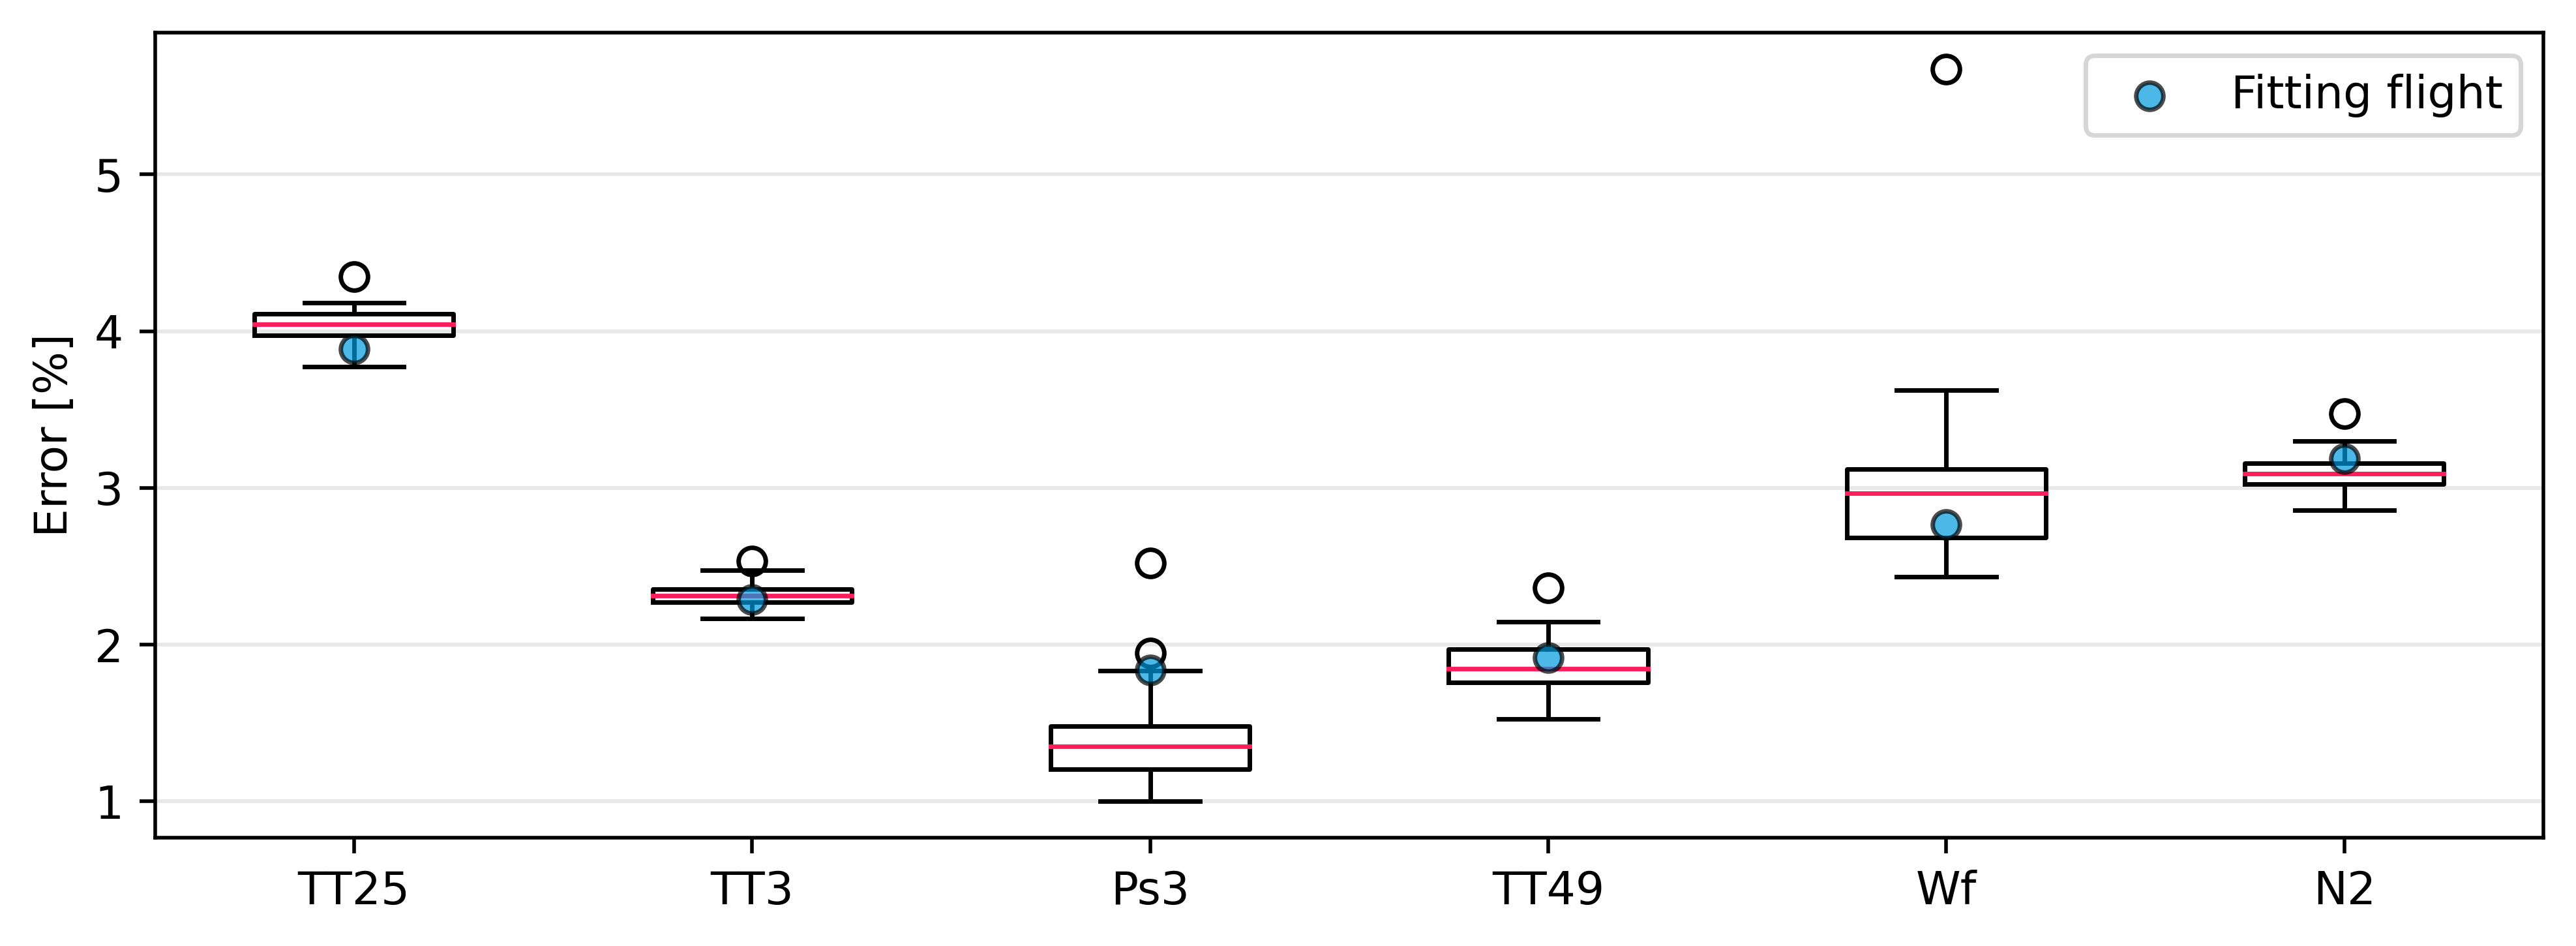

In [182]:
create_boxplot(np.array(takeoff_error_uncorrected_list), meanL_training_uncorrected[0], "take off uncorrected boxplot")
create_boxplot(np.array(climb_error_uncorrected_list), meanL_training_uncorrected[1], "climb uncorrected boxplot")
create_boxplot(np.array(cruise_error_uncorrected_list), meanL_training_uncorrected[2], "cruise uncorrected boxplot")